# Exercise 8: Analysis of Taylor Swift's songs (⭐️⭐️⭐️)

Since Taylor Swift is one of the best artists of our time, we thought she deserved a spotlight in our exercises. The data presented in this exercise is collected via Spotify and it contains all of her songs/albums up until 2020, together with information about each song such as popularity and danceability. In this exercise we want you to analyse some of this data and find out more about Taylor. Who knows, you might even discover a song or two that you like?

**IMPORTANT:** To be able to complete this exercise you must have completed the statistical theory and coding tutorial.

Below is a description of the dataset.

- name - Name of song
- album - Name of album
- artist - Name of artist/s involved
- release_date - Release date of album
- length - Song length in milliseconds
- popularity - Percent popularity of the song based on Spotify's algorithm (possibly the number of stream at a certain period of time)
- danceability - How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity
- acousticness - How acoustic a song is
- energy - A perceptual measure of intensity and activity
- instrumentalness - Te amount of vocals in the song
- liveness - Probability that the song was recorded with a live audience
- loudness - Tdency o of music to be recorded at steadily higher volumes
- speechiness - Presence of spoken words in a track (if the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech)
- valence - A measure of how happy or sad the song sounds
- tempo - Beats per minute

Note to Swifties: Unfortuntely the dataset does not contain the re-recorded albums (e.g. Taylor's Versions), though that might be a blessing in disguise as the 10-minute version of All Too Well would have likely skewed your statistical results.

Using the dataset, address the following exercises:

**Exploratory Analsysis**

1. Read the csv file using a dataframe
2. What are Taylor's most popular and least popular songs?
3. Which album had the highest popularity and when was it published?
4. Which songs are the most danceable?
5. Are danceable songs more popular than accoustic ones?
6. Notice that the length of the songs is stored in milliseconds. Although accurate, those measures are not very interpretable. Figure out a way to convert the song length to minutes, then find her longest song. Furthermore, correlate the song length with a measure of popularity. Are long songs more popular?
7. Which songs are more popular, her sad songs or her happy songs? <br> <br>
**HINT:** The quickest way to understand your data is to visualize it

**Data Analysis**

Now that we had a good look at the data, we might wonder, what makes a song popular? Is it its tempo, its danceability or it its length? Or perhaps is it mainly the lyrics and the songrwriting that make her songs popular?

8. Correlate different song features and find out which ones are the most closely related and how.
9. Predict the popularity of a song using its tempo, danceability and length via a linear regression. Also control for the album, as some albums are more popular than others. Feel free to include other features that you may have found useful in the previous analysis
10. Use an ANOVA to determine whether there is a statistically significant difference in popularity and speechiness across albums. <br> <br>
**HINT:** Before you run any of your analyses, make sure you follow all the appropiate data visualisation and pre-processing steps, such as checking for missing values, removing outliers and determining whether or not your data is normally distributed.

In [197]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [198]:
path_to_file = '../Day1/Data/spotify_taylorswift.csv'
df = pd.read_csv(path_to_file)
df.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [199]:
#What are Taylor's most popular and least popular songs?

df_sorted = df.sort_values(by="popularity", ascending = False)
print("Top 3 most popular songs are")
print(df_sorted.name.iloc[0:3])
print("The top 3 least popular songs are")
print(df_sorted.name.iloc[-3:])

Top 3 most popular songs are
60     Blank Space
64    Shake It Off
Name: name, dtype: object
The top 3 least popular songs are
76    I Wish You Would - Voice Memo
75       I Know Places - Voice Memo
77         Blank Space - Voice Memo
Name: name, dtype: object


Notice that all the least popular songs seem to be voice memos. Should we even consider these as songs? Later on, we will decide whether we want to exclude those or not from our data.

['2019-08-23']


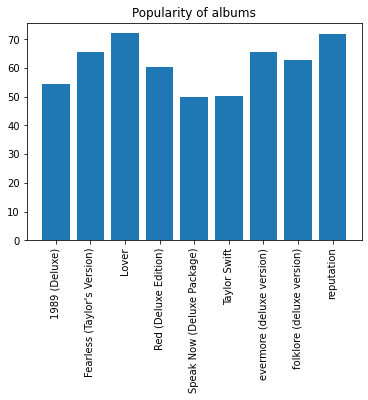

In [200]:
#Which album had the highest popularity and when was it published?

albums = np.unique(df.album)
album_popularity =[];
for name in albums:
    df_album = df[df.album == name]
    album_popularity.append(df_album.popularity.mean())


plt.bar(albums, album_popularity)
plt.title("Popularity of albums")
_ = plt.xticks(rotation=90)

release_date_lover = np.unique(df.release_date[df.album == 'Lover'])
print(release_date_lover)


In [201]:
#Which songs are the most danceable?

df_sorted_danceability = df.sort_values(by="danceability", ascending = False)
df_sorted_danceability.head()
print("Top 3 most danceable songs are")
print(df_sorted_danceability.name.iloc[0:3])


Top 3 most danceable songs are
98                          I Think He Knows
56     Treacherous - Original Demo Recording
101                          Cornelia Street
Name: name, dtype: object


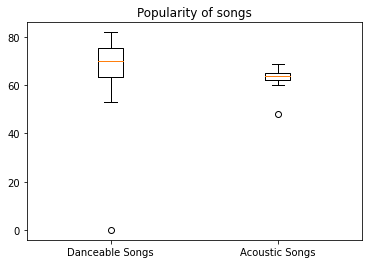

In [202]:
#Are danceable songs more popular than accoustic ones?

df_sorted_danceability = df.sort_values(by="danceability", ascending = False)
top_10_danceability = df_sorted_danceability.head(20)
danceability_popularity = df_sorted_danceability.popularity.iloc[0:19]

df_sorted_acousticness = df.sort_values(by="acousticness", ascending = False)
top_10_acousticness = df_sorted_acousticness.head(10)
acousticness_popularity = df_sorted_acousticness.popularity.iloc[0:19]

plt.figure(figsize = (6, 4))
plt.title("Popularity of songs")
_ = plt.boxplot([danceability_popularity, acousticness_popularity])
_ = plt.xticks([1, 2],["Danceable Songs", "Acoustic Songs"])

# You can also run statistics on this to see if you have a significant difference between groups. 
# Feel free to modify this and add your own code.


The longest song of Taylor Swift is called Dear John
0.011771579230012099
0.8785484122130801


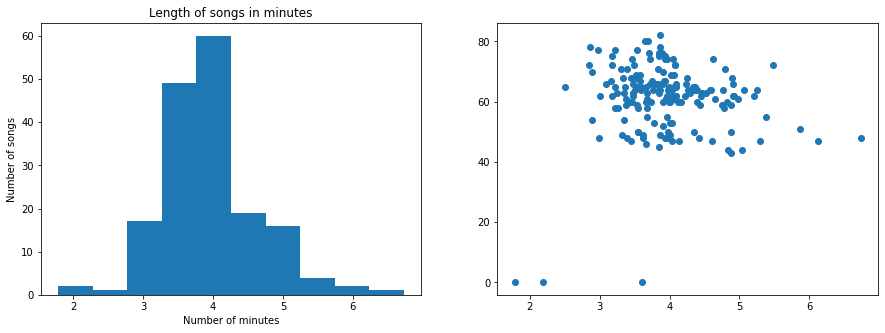

In [203]:
# Notice that the length of the songs is stored in milliseconds. Although accurate, those measures are not very interpretable. 
# Figure out a way to convert the song length to minutes, then find her longest song. 
# Furthermore, correlate the song length with a measure of popularity. Are long songs more popular?

df_length_in_mins = (df.length/1000)/60
df.length = df_length_in_mins

df_sorted_by_song_length = df.sort_values(by="length", ascending = False)
longest_song = df_sorted_by_song_length.name.iloc[0]
print("The longest song of Taylor Swift is called " + longest_song) 

plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
plt.hist(df_length_in_mins)
plt.title("Length of songs in minutes")
plt.ylabel("Number of songs")
plt.xlabel("Number of minutes")
plt.subplot(1,2,2)
plt.scatter(df.length,df.popularity)

rvalue, pvalue = stats.pearsonr(df.length,df.popularity)
print(rvalue)
print(pvalue)

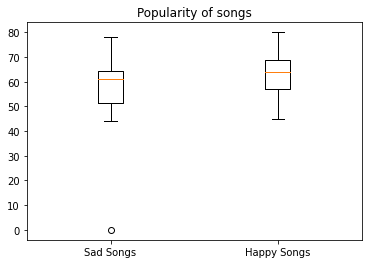

In [204]:
#Which songs are more popular, her sad songs or her happy songs?

df_sorted_valence = df.sort_values(by="valence")
df_sad = df_sorted_valence.iloc[0:19]
df_happy = df_sorted_valence.iloc[-20:,:]

plt.figure(figsize = (6, 4))
plt.title("Popularity of songs")
_ = plt.boxplot([df_sad.popularity, df_happy.popularity])
_ = plt.xticks([1, 2],["Sad Songs", "Happy Songs"])


Before we do any data analysis on the data, it's important we do some minimal cleaning, see if the data is normally distributed and check for outliers. The quickest way to do this is to visualise your data.

(array([ 3.,  0.,  0.,  0.,  0., 22., 15., 75., 36., 20.]),
 array([ 0. ,  8.2, 16.4, 24.6, 32.8, 41. , 49.2, 57.4, 65.6, 73.8, 82. ]),
 <BarContainer object of 10 artists>)

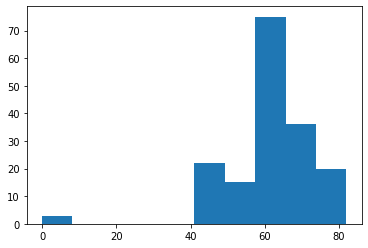

In [205]:
df = pd.read_csv(path_to_file)
plt.hist(df.popularity)

Here we can clearly see that some songs have 0 popularity, making them stand out from the others. Let's check the names of these songs.

In [206]:
df[df.popularity < 20]

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
75,75,I Know Places - Voice Memo,1989 (Deluxe),Taylor Swift,2014-01-01,216333,0,0.592,0.829,0.128,0.0,0.527,-17.932,0.589,0.150,78.828
76,76,I Wish You Would - Voice Memo,1989 (Deluxe),Taylor Swift,2014-01-01,107133,0,0.781,0.717,0.357,0.0,0.185,-16.394,0.912,0.645,118.317
77,77,Blank Space - Voice Memo,1989 (Deluxe),Taylor Swift,2014-01-01,131186,0,0.675,0.801,0.234,0.0,0.657,-15.064,0.721,0.578,127.296


We can see that all 3 of them are voice memos and if we were to go to spotify and listen to those, we would notice that they are not actually songs, but short descriptions of the songs that Taylor included as bonus content on the 1989 album. That gives us enough reason to remove them from our dataset.

(array([ 5., 22.,  7.,  8., 36., 44., 16., 16., 11.,  3.]),
 array([43. , 46.9, 50.8, 54.7, 58.6, 62.5, 66.4, 70.3, 74.2, 78.1, 82. ]),
 <BarContainer object of 10 artists>)

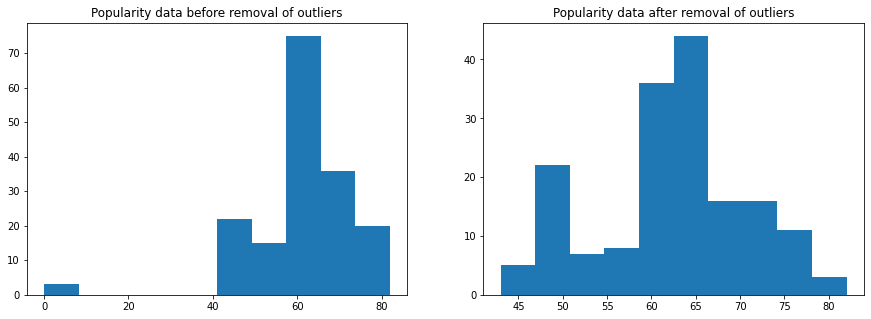

In [207]:

plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
plt.title('Popularity data before removal of outliers')
plt.hist(df.popularity)
plt.subplot(1,2,2)
plt.title('Popularity data after removal of outliers')
df = df[df.popularity != 0]
plt.hist(df.popularity)

Now let's check the distributions of the remaining variables 

Text(0.5, 1.0, 'Energy')

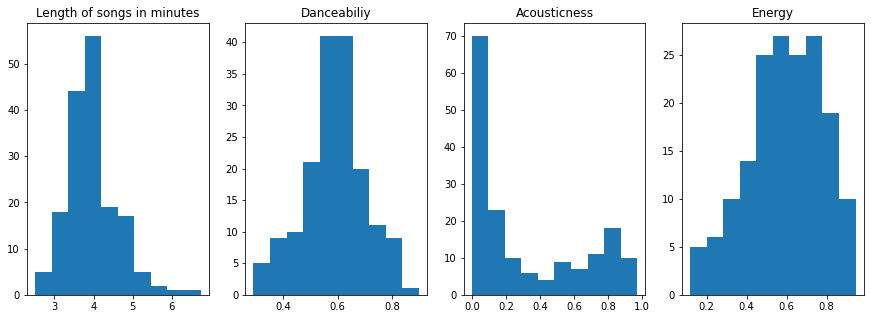

In [208]:
plt.figure(figsize = (15, 5))
plt.subplot(1,4,1)
plt.hist(df.length/1000/60)
plt.title('Length of songs in minutes')
plt.subplot(1,4,2)
plt.hist(df.danceability)
plt.title('Danceabiliy')
plt.subplot(1,4,3)
plt.hist(df.acousticness)
plt.title('Acousticness')
plt.subplot(1,4,4)
plt.hist(df.energy)
plt.title('Energy')

These look good, no obvious outliers. Though we can see that some of the don't follow a normal distribution.

Text(0.5, 1.0, 'Speechiness')

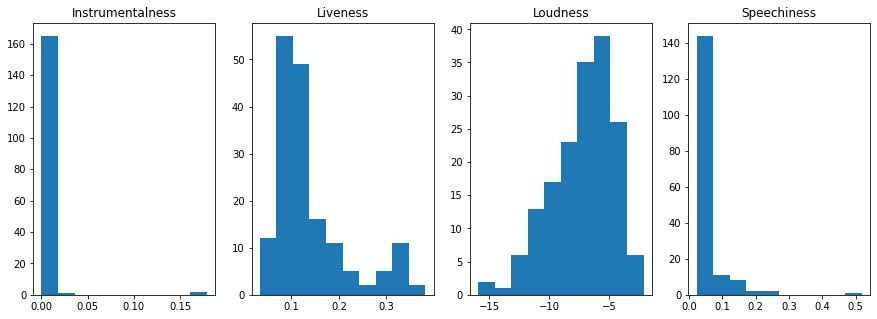

In [209]:
plt.figure(figsize = (15, 5))
plt.subplot(1,4,1)
plt.hist(df.instrumentalness)
plt.title('Instrumentalness')
plt.subplot(1,4,2)
plt.hist(df.liveness)
plt.title('Liveness')
plt.subplot(1,4,3)
plt.hist(df.loudness)
plt.title('Loudness')
plt.subplot(1,4,4)
plt.hist(df.speechiness)
plt.title('Speechiness')

Here we see that for instrumentalness and speechiness there seem to be some obvious outliers. Let's have a closer look to see where they come from

In [210]:
df[df.instrumentalness > 0.05]

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
130,130,gold rush,evermore (deluxe version),Taylor Swift,2021-01-07,185320,66,0.512,0.83,0.462,0.166,0.1210,-10.491,0.0408,0.353,112.050
139,139,long story short,evermore (deluxe version),Taylor Swift,2021-01-07,215920,64,0.546,0.66,0.730,0.179,0.0972,-7.704,0.0417,0.573,157.895


In [211]:
df[df.speechiness > 0.4]

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
93,93,I Forgot That You Existed,Lover,Taylor Swift,2019-08-23,170640,72,0.664,0.298,0.316,0.000002,0.0812,-10.345,0.519,0.541,92.875


If we were to listen to these songs we would notice that they are valid. It just so happens that these songs are very high on speechiness/instrumentalness, when compared to the others. It could mean that Taylor was experimenting with these songs. So, even though they are quite different from the others on these measures, the data is still valid so we won't remove them. 

Hopefully, from this you will understand why it is tricky to work with outliers. If you wanted to, you could do a winsorisation on those outliers, but in thise case we don't think it's necessary.

Text(0.5, 1.0, 'Tempo')

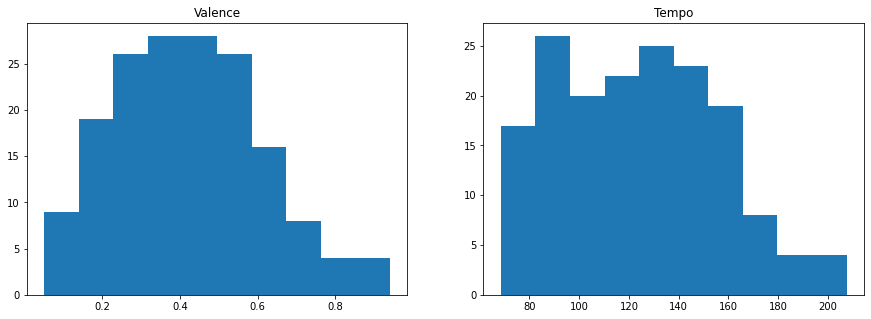

In [212]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
plt.hist(df.valence)
plt.title('Valence')
plt.subplot(1,2,2)
plt.hist(df.tempo)
plt.title('Tempo')

No outliers here either

In [213]:
# Check for missing values

df.isna().sum() 

Unnamed: 0          0
name                0
album               0
artist              0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
valence             0
tempo               0
dtype: int64

In [214]:
# Check for duplicated rows
sum(df.duplicated())

0

In [215]:
# Correlate different song features and find out which ones are the most closely related and how.
df.drop(columns=['Unnamed: 0', 'name', 'artist', 'release_date'], inplace=True)
df.corr(method ='spearman')

/var/folders/01/_3yj40_538g8lmscwcv139hm0000gp/T/ipykernel_77661/138773485.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='spearman')


,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
length,1.000000,-0.223074,-0.296934,0.104129,-0.196572,0.029071,-0.048317,-0.068580,-0.391377,-0.409637,0.048990
popularity,-0.223074,1.000000,0.203852,0.023175,-0.049468,0.134041,-0.178762,-0.293456,0.482353,0.069378,-0.088699
danceability,-0.296934,0.203852,1.000000,-0.100671,0.083872,0.055166,-0.115814,-0.011971,0.204531,0.384917,-0.228356
acousticness,0.104129,0.023175,-0.100671,1.000000,-0.685992,0.024680,-0.061835,-0.686350,-0.107872,-0.275776,-0.111323
energy,-0.196572,-0.049468,0.083872,-0.685992,1.000000,0.000678,0.135025,0.744253,0.268476,0.532583,0.237421
instrumentalness,0.029071,0.134041,0.055166,0.024680,0.000678,1.000000,-0.271119,-0.308110,0.288814,0.040914,-0.111789
liveness,-0.048317,-0.178762,-0.115814,-0.061835,0.135025,-0.271119,1.000000,0.230420,-0.076231,-0.035038,0.106951
loudness,-0.068580,-0.293456,-0.011971,-0.686350,0.744253,-0.308110,0.230420,1.000000,-0.104005,0.331471,0.191675
speechiness,-0.391377,0.482353,0.204531,-0.107872,0.268476,0.288814,-0.076231,-0.104005,1.000000,0.265482,0.209145
valence,-0.409637,0.069378,0.384917,-0.275776,0.532583,0.040914,-0.035038,0.331471,0.265482,1.000000,-0.022534


In [216]:
# Predict the popularity of a song using its tempo, danceability and length via a linear regression. 
# Also control for the album, as some albums are more popular than others. 
# Feel free to include other features that you may have found useful in the previous analysis

model = sm.OLS.from_formula('popularity ~ length + danceability + tempo + album', data = df) #Here we mention the variable names we want to include and the dataset
results = model.fit() #Then we run the regression model
print(results.summary()) #Finally, we tell Python to create a summary of all the results and print it

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     42.03
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           4.49e-41
Time:                        17:51:34   Log-Likelihood:                -485.67
No. Observations:                 168   AIC:                             995.3
Df Residuals:                     156   BIC:                             1033.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [225]:
# Use an ANOVA to determine whether there is a statistically significant difference in popularity and speechiness across albums. 

pop_1989 = df.popularity[df.album == '1989 (Deluxe)']
pop_fearless = df.popularity[df.album == 'Fearless (Taylor\'s Version)']
pop_lover = df.popularity[df.album == 'Lover']
pop_red = df.popularity[df.album == 'Red (Deluxe Edition)']
pop_speak = df.popularity[df.album == 'Speak Now (Deluxe Package)']
pop_tayswift = df.popularity[df.album == 'Taylor Swift']
pop_evermore = df.popularity[df.album == 'evermore (deluxe version)']
pop_folklore = df.popularity[df.album == 'folklore (deluxe version)']
pop_reputation = df.popularity[df.album == 'reputation']


fstat, pval = stats.f_oneway(pop_1989, pop_fearless, pop_lover, pop_red, pop_speak, pop_tayswift, pop_evermore, pop_folklore, pop_reputation)
print(fstat,pval)

57.89882940646044 2.9545242793430203e-43


In [226]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=df['popularity'], groups=df['album'], alpha=0.05)
print(tukey)

                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
           group1                      group2           meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------------------
              1989 (Deluxe) Fearless (Taylor's Version)   0.9519 0.9991   -3.553   5.4569  False
              1989 (Deluxe)                       Lover   7.4861 0.0001   2.6147  12.3575   True
              1989 (Deluxe)        Red (Deluxe Edition)   -4.125 0.1281  -8.7834   0.5334  False
              1989 (Deluxe)  Speak Now (Deluxe Package) -14.8977    0.0 -19.5561 -10.2394   True
              1989 (Deluxe)                Taylor Swift -14.4917    0.0 -19.5872  -9.3961   True
              1989 (Deluxe)   evermore (deluxe version)   0.8456 0.9998  -4.0928    5.784  False
              1989 (Deluxe)   folklore (deluxe version)  -1.9779 0.9413  -6.9163   2.9605  False
              1989 (Deluxe)   